In [4]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

print(torch.__version__)

1.6.0


In [13]:
# Load the trained model 
model = torch.load('../../weights.pt', map_location=torch.device('cpu'))
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [7]:
# Read  a sample image and mask from the data-set
originalImage = cv2.imread("../../dataset/subsamples/images/multiperson_headrende0000.png")

# Resize image
# img = cv2.resize(originalImage, (256, 256), cv2.INTER_AREA).transpose(2,0,1)

# Uncomment above line and use the below one for inference with original image size
img = originalImage.transpose(2,0,1)

img = img.reshape(1, 3, img.shape[1],img.shape[2])

mask = cv2.imread("../../dataset/subsamples/masks/multiperson_headrende0000.png")
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.FloatTensor)/255)

(array([   872., 102345.,  29351.,  10503.,  12979.,  43454.,  30923.,
          6360.,   5114.,  10099.]),
 array([-0.22327682, -0.10099219,  0.02129245,  0.14357708,  0.26586172,
         0.38814634,  0.510431  ,  0.63271564,  0.75500023,  0.8772849 ,
         0.99956954], dtype=float32),
 <BarContainer object of 10 artists>)

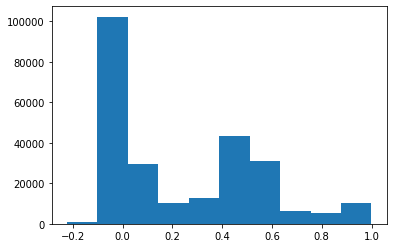

In [8]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

In [9]:
import numpy as np

def interval_mapping(image, from_min, from_max, to_min, to_max):
    # map values from [from_min, from_max] to [to_min, to_max]
    # image: input array
    from_range = from_max - from_min
    to_range = to_max - to_min
    scaled = np.array((image - from_min) / float(from_range), dtype=float)
    return to_min + (scaled * to_range)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


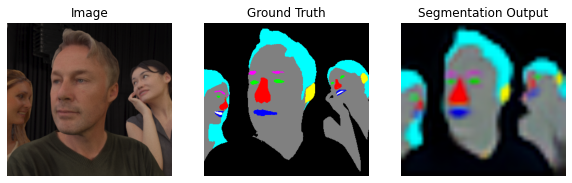

In [12]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);

image = cv2.cvtColor(img[0].transpose(1,2,0), cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap="viridis");
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask, cmap="jet");
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);

from matplotlib import colors, cm

outImage = a['out'].cpu().detach().numpy()[0]
# norm = colors.LogNorm(outImage.mean() + 0.5 * outImage.std(), outImage.max(), clip=True)

# outImage = interval_mapping(outImage, outImage.min(), outImage.max(), 0, 255)
plt.imshow(outImage.transpose(1,2,0));
plt.title('Segmentation Output')
plt.axis('off');